In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# PART 1

In [2]:
logins = pd.read_json('logins.json')
logins['logins'] = 1
logins= logins.set_index('login_time')
logins.head(10)

,logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
1970-01-01 20:21:41,1
1970-01-01 20:12:16,1
1970-01-01 20:35:47,1
1970-01-01 20:35:38,1


In [3]:
logins_15min = logins.resample('15min').sum()
logins_15min.head()

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [4]:
logins['weekday'] = logins.index.weekday

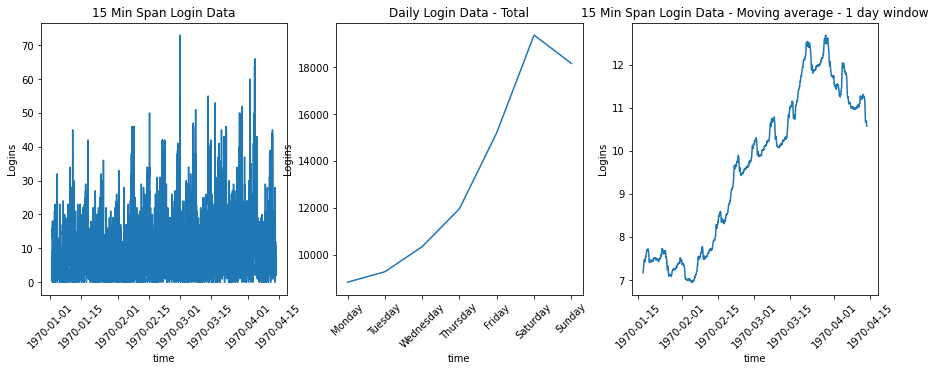

In [5]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.plot(logins_15min)
plt.title('15 Min Span Login Data')
plt.xlabel('time')
plt.ylabel('Logins')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.plot(logins.groupby('weekday').sum(), )
plt.title('Daily Login Data - Total')
plt.xlabel('time')
plt.ylabel('Logins')
plt.xticks([0, 1, 2, 3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

plt.subplot(1,3,3)
plt.plot(logins_15min.rolling(15*4*24).mean())
plt.title('15 Min Span Login Data - Moving average - 1 day window')
plt.xlabel('time')
plt.ylabel('Logins')
plt.xticks(rotation=45)

plt.show()

### Key take aways:
A) There is a periodicity in the logins data: weekends have the highest number of logins

B) The number of logins increased steadily until April, but started decreasing after that 

# PART 2 

## Since there is a sort of temporal silo phenomenon during the weekdays (complementary circadian rhythms), I would focus on the number of rides in the weekends. With the information provided I would assume that each driver partner serves mostly one city. If the experiment is successful, I would expect each driver partner to equally operate in both cities in the weekends. 
#### 1) For each drivers I will calculate the proportion of rides he/she gives in the city he/she operate the most.  Before the start of the experiment that the proportion average is very high, close to 1. Once the experiment is initiated, drivers will be incentivized to operate in both cities and thus the metric will trend towards 0.5 (idealy) 
#### 2a) I assume that three months would be enough to determine whether the experiment is working or not. Thus, I will compare three months rides data collected before and after the toll reimbursement program is initiated. 
#### 2b) I would use a T-test with p = 0.05 to determine whethe the initiative is working. H0: mean proportion rides before  =  mean proportion rides  after;  H1: mean proportion rides before  !=  mean proportion rides  after
#### 2c) If the null hypothesis is rejected I can conclude that riders are operating more in the city they initially didn't operate as much. However, this only shows that there is a statistically significant difference but would not imply any real benefit. For instance a drop of the proportion metric from 0.95 to 0.85 could be found statistically different, but probably won't have any  impact on the city transportation system. It was not specified which was the business target the managers were aiming for. This would help with giving a better advice. With the information provided, if the metric statistically drops over the first 3 months and it seems not having reached a plateau, I would suggest to prolong the program for another 3 months to reach a steady state.

# PART 3 

In [6]:
cities = pd.read_json('ultimate_data_challenge.json')
cities.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


# PART3 - 1

## A) Data Wrangling

In [7]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
# missing avg_rating_of_driver --> to substitute with mean 
# missing avg_rating_by_driver --> to substitute with mean 
cities['avg_rating_of_driver'].fillna(cities['avg_rating_of_driver'].mean(), inplace = True)
cities['avg_rating_by_driver'].fillna(cities['avg_rating_by_driver'].mean(), inplace = True)

In [9]:
# missing avg_rating_of_driver --> to substitute with iPhone', 'Android' with the same proportion of the original dataset 
cities['phone'].value_counts(normalize = True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [10]:
def fillna(r):
    if r not in ['iPhone', 'Android']:
        return np.random.choice(['iPhone', 'Android'], p=[0.7, 0.3])

In [11]:
cities['phone'].apply(lambda x: fillna(x))
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
cities['last_trip_date'] = pd.to_datetime(cities['last_trip_date'])
cities['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [13]:
def isuser(f):
    if f > datetime.datetime.strptime('2014-06-01', "%Y-%m-%d"):
        return 1
    else:
        return 0

In [14]:
cities['Active'] = cities['last_trip_date'].apply(lambda x : isuser(x))
cities.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,2014-01-03,4.601559,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0


In [15]:
cities['Active'].value_counts(normalize = True)


0    0.6338
1    0.3662
Name: Active, dtype: float64

**37% of the users were retained**

## B) EDA

In [16]:
def plotViolin(column, title):
    plt.subplot(2,1,1)
    sns.violinplot(cities[cities['Active'] ==1][column], label = 'Current User', bins =15, alpha = 0.5)
    plt.title(title)
    plt.ylabel('Active User')
    plt.subplot(2,1,2)
    sns.violinplot(cities[cities['Active'] ==0][column], label = 'Drop out', bins =15, alpha = 0.5)
    plt.ylabel('NON Active User')
    plt.xlabel('')
    plt.show()
    

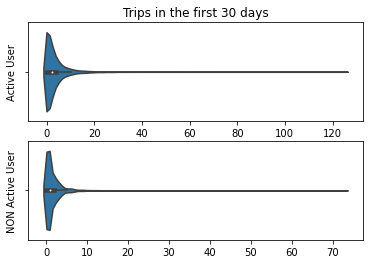

In [17]:
# trip in the first 30 days 
plotViolin('trips_in_first_30_days', 'Trips in the first 30 days')

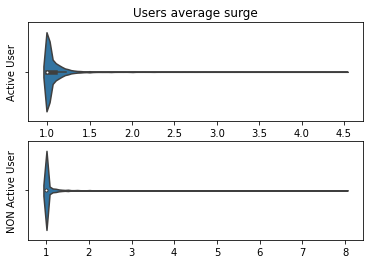

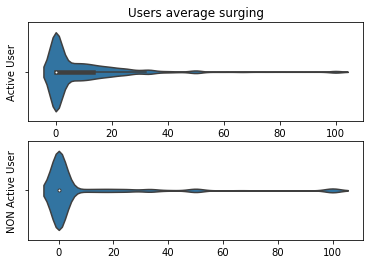

In [18]:
# Average Surge 
plotViolin('avg_surge', 'Users average surge')

# PCT Surge 
plotViolin('surge_pct', 'Users average surging')


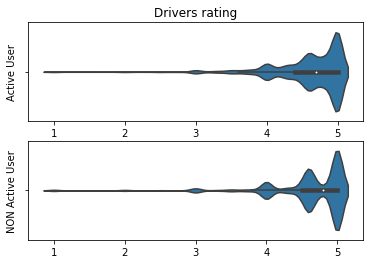

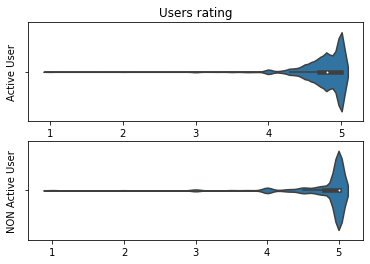

In [19]:
# RATINGS
plotViolin('avg_rating_of_driver', 'Drivers rating')
plotViolin('avg_rating_by_driver', 'Users rating')

**A significant portion of the users with rating between 4.25 and 4.5 (roughly) are retained**

In [36]:
# usage of ultimate_black_user
cities.groupby('Active')['ultimate_black_user'].value_counts(normalize = True)

Active  ultimate_black_user
0       False                  0.700379
        True                   0.299621
1       True                   0.511141
        False                  0.488859
Name: ultimate_black_user, dtype: float64

**Ultimate_black users are less likely to drop out.**

In [21]:
# USERS by phone
cities.groupby('Active')['phone'].value_counts(normalize = True)

Active  phone  
0       iPhone     0.615580
        Android    0.384420
1       iPhone     0.838174
        Android    0.161826
Name: phone, dtype: float64

**iphone users are less likely to drop out.**

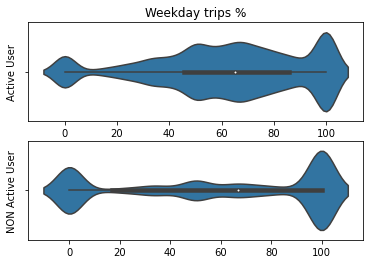

In [22]:
# weekday trips 
plotViolin('weekday_pct', 'Weekday trips %')

In [23]:
# usage by CITY
cities.groupby('Active')['city'].value_counts(normalize = True)

Active  city          
0       Winterfell        0.484538
        Astapor           0.394825
        King's Landing    0.120637
1       Winterfell        0.435882
        King's Landing    0.344457
        Astapor           0.219661
Name: city, dtype: float64

**It seems that users who signed in from Astapor are more likely to drop out**

# PART3 - 2 

In [24]:
X = cities.drop(['signup_date', 'last_trip_date', 'Active'], axis =1)
X['ultimate_black_user'] = X['ultimate_black_user'].astype('str')
X = pd.get_dummies(X, drop_first = True)
y = cities['Active']
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.naive_bayes import MultinomialNB


## Logistic Regression Classifier

In [26]:
params={'C':[0.01, 0.1, 1, 10]}

classifier = LogisticRegression(max_iter=2000)

Grid = GridSearchCV(classifier, param_grid = params, cv = 5)
Grid.fit(X_train, y_train)
pred = Grid.predict(x_test)

accuracy = balanced_accuracy_score(y_test, pred, adjusted = True)

print('Accuracy is', accuracy)


Accuracy is 0.35085040215530783


In [27]:
confusion_matrix(y_test, pred)

array([[5526,  813],
       [1907, 1754]], dtype=int64)

AREA UNDER ROC curve is 0.76939170155796


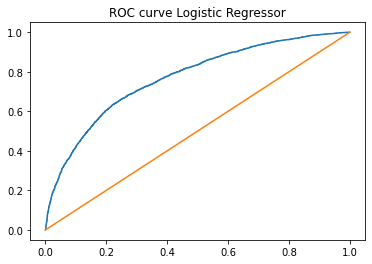

In [34]:
LRprob = Grid.predict_proba(x_test)[:,1]
fpr, tpr, thresholds  = roc_curve( y_test, LRprob)
print('AREA UNDER ROC curve is', auc(fpr,tpr))
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1])
plt.title('ROC curve Logistic Regressor')
plt.show()

## Random Forest Classifier

In [29]:
randomF  = RandomForestClassifier()
paramsF = {'n_estimators': [50, 100], 'min_samples_leaf': [1,2,5]}
GridF = GridSearchCV(randomF, param_grid = paramsF, cv = 5)
GridF.fit(X_train, y_train)
predF = GridF.predict(x_test)
accuracyF = balanced_accuracy_score(y_test, predF, adjusted = True)
print('Accuracy of RFC is', accuracyF)
confusion_matrix(y_test, predF)

Accuracy of RFC is 0.5262926885369761


array([[5504,  835],
       [1252, 2409]], dtype=int64)

AREA UNDER ROC curve is 0.8576932710919801


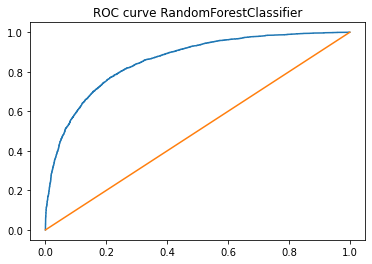

In [33]:
LRprobF = GridF.predict_proba(x_test)[:,1]
fprF, tprF, thresholds  = roc_curve( y_test, LRprobF)
print('AREA UNDER ROC curve is', auc(fprF,tprF))
plt.plot(fprF,tprF)
plt.plot([0,1], [0,1])
plt.title('ROC curve RandomForestClassifier')
plt.show()

## MultinomialNB

In [31]:
MNNB  = MultinomialNB()
paramsMNNB = {'alpha': [0.1,1]}
GridMNC = GridSearchCV(MNNB, param_grid = paramsMNNB , cv = 5)
GridMNC.fit(X_train, y_train)
predMNNB = GridMNC.predict(x_test)
accuracyMNNB = balanced_accuracy_score(y_test, predMNNB, adjusted = True)
print('Accuracy of RFC is', accuracyMNNB)
confusion_matrix(y_test, predMNNB)

Accuracy of RFC is 0.2521912387164278


array([[5214, 1125],
       [2088, 1573]], dtype=int64)

AREA UNDER ROC curve is 0.6793532697501482


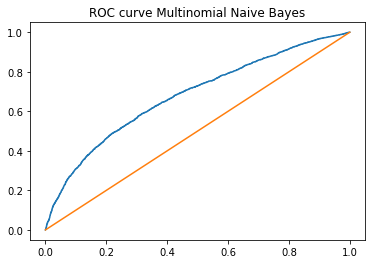

In [35]:
LRprobN  = GridMNC.predict_proba(x_test)[:,1]
fprFN, tprFN, thresholds  = roc_curve( y_test, LRprobN)
print('AREA UNDER ROC curve is', auc(fprFN,tprFN))
plt.plot(fprFN,tprFN)
plt.plot([0,1], [0,1])
plt.title('ROC curve Multinomial Naive Bayes')
plt.show()

# PART3 - 2 

**Conclusion:**
**The issue at hand problem is basically a classification problem. I used 3 common classifiers: the logistic regression, the random forest classifier and multinomia Naive bayes **

The random forest clasifier (RFC) works the best. The AUC of the RFC is 0.92 and the balanced accuracy is 0.52.

Another classifier I would have utilized is neural network. 

RFC is pretty good in identifying most of the users who will drop (TPR = 5520/ (5520 + 1278)). Ultimate could utilize these insights to approach those putative drop-outs with discouts or other offers to mantain the customer engaged and loyal. 